In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('HER2.csv', index_col = 0)
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V18,V19,V20,V21,V22,V23,V24,V25,V26,Eads(H)
1,2.2,1.93,10,10,1.37,1.44,1.0,1.0,0.9,1.0,...,0.00,0.60,0.33,4,0,0,2,0,0,-0.51
2,2.2,1.93,10,10,1.37,1.44,1.0,1.0,0.9,1.0,...,0.00,0.60,0.33,4,0,0,2,0,0,-0.55
3,2.2,1.93,10,10,1.37,1.44,1.0,1.0,0.9,1.0,...,0.00,0.33,0.23,4,0,0,2,0,0,-0.51
4,2.2,1.93,10,10,1.37,1.44,1.0,1.0,0.9,1.0,...,0.00,0.45,0.14,4,0,0,2,0,0,-0.47
5,2.2,1.93,10,10,1.37,1.44,1.0,1.0,0.9,1.0,...,0.00,0.60,0.33,4,0,0,2,0,0,-0.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459,2.2,2.54,10,10,1.37,1.44,1.0,1.0,0.9,1.0,...,0.25,2.20,3.00,2,2,0,1,1,0,-0.45
460,2.2,2.54,10,10,1.37,1.44,1.0,1.0,0.9,1.0,...,0.25,2.20,3.00,2,2,0,1,1,0,-0.52
461,2.2,2.54,10,10,1.37,1.44,1.0,1.0,0.9,1.0,...,0.00,3.00,7.00,4,0,0,2,0,0,-0.53
462,2.2,2.54,10,10,1.37,1.44,1.0,1.0,0.9,1.0,...,0.00,2.20,3.00,4,0,0,2,0,0,-0.55


In [3]:
X = df.drop('Eads(H)', axis = 1)
y = df['Eads(H)']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [5]:
X_train_s = (X_train - X_train.mean()) / (X_train.max() - X_train.min())
X_test_s = (X_test - X_train.mean()) / (X_train.max() - X_train.min())

In [7]:
nn = MLPRegressor(hidden_layer_sizes = (64, 64), random_state = 1)

In [8]:
nn.fit(X_train_s, y_train)

MLPRegressor(hidden_layer_sizes=(64, 64), random_state=1)

In [9]:
nn.score(X_train_s, y_train)

0.9847376170146904

In [11]:
nn.score(X_test_s, y_test)

0.974876021687024

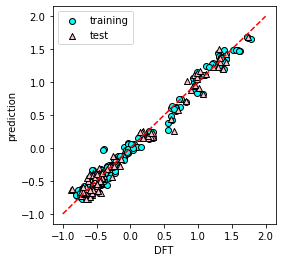

In [12]:
plt.figure(figsize = (4, 4))
plt.scatter(y_train, nn.predict(X_train_s), color = 'cyan',
            edgecolor = 'k', label = 'training')
plt.scatter(y_test, nn.predict(X_test_s), c = 'pink',
           marker = '^', edgecolor = 'k', label = 'test')
plt.plot([-1.0, 2.0], [-1.0, 2.0], 'r--')
plt.legend()
plt.xlabel('DFT')
plt.ylabel('prediction')
plt.show()